# Exploratory Data Analysis for Sales Data

## Aim:
        To perform an exploratory data analysis on sales data and find the factors contributing to profit.

## Importing the Required Libraries.

In [2]:
import numpy as np
#for handling arrays 
import pandas as pd
# for handling the csv files and rows in data set
import matplotlib.pyplot as plt
# for showing various plots
import seaborn as sns
#for showing various distplots

## Importing the dataset 

In [3]:
dataset = pd.read_csv(r'C:\Users\admin\Documents\The Sparks Foundation\SampleSuperstore.csv')

In [4]:
dataset.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [5]:
set(dataset['Country'])
# Since United States is the only country, we can drop this column,

{'United States'}

In [6]:
# Dropping Country column
dataset = dataset.drop('Country',axis=1)

In [7]:
dataset.head(10)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


## Performing Exploratory Data Analysis

### Ship mode vs profit

In [8]:
set(dataset['Ship Mode'])

{'First Class', 'Same Day', 'Second Class', 'Standard Class'}

In [9]:
dataset[['Ship Mode','Profit']].groupby(['Ship Mode'],as_index = False).mean()

,Ship Mode,Profit
0,First Class,31.839948
1,Same Day,29.266591
2,Second Class,29.535545
3,Standard Class,27.494770


## Inference
Profit is somewhat evenly distributed between all 4 ship modes.

### City-wise profit 

In [10]:
dataset[['City','Profit']].groupby(['City'],as_index = False).mean()

,City,Profit
0,Aberdeen,6.630000
1,Abilene,-3.758400
2,Akron,-8.887410
3,Albuquerque,45.292007
4,Alexandria,19.913644
...,...,...
526,Woonsocket,19.669775
527,Yonkers,184.517047
528,York,-20.433840
529,Yucaipa,13.208000


In [11]:
## Checking size of dataset
dataset.shape

(9994, 12)

### State-wise profit

In [12]:
dataset[['State','Profit']].groupby(['State'],as_index = False).mean()

,State,Profit
0,Alabama,94.865989
1,Arizona,-15.303235
2,Arkansas,66.811452
3,California,38.171608
4,Colorado,-35.867351
5,Connecticut,42.823071
6,Delaware,103.930988
7,District of Columbia,105.958930
8,Florida,-8.875461
9,Georgia,88.315453


### Inference
  States Like Wyoming, Vermont, Montana, Minnesota, Indiana, District of Columbia and Delaware have high profit     reliability. Whereas Texas, North Carolina, Tennessee and Colarado have a higher liklihood of loss than a profit.

### Region

In [14]:
dataset[['Region','Profit']].groupby(['Region'],as_index = False).mean()

,Region,Profit
0,Central,17.092709
1,East,32.135808
2,South,28.857673
3,West,33.849032


### Inference
Central region had the most unreliable profits and the others are about the same.

### Categories


In [15]:
dataset[['Category','Profit']].groupby(['Category'],as_index = False).mean()

,Category,Profit
0,Furniture,8.699327
1,Office Supplies,20.327050
2,Technology,78.752002


In [31]:
dataset[['Category','Profit']].groupby(['Category'],as_index = False).sum()

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


### Inference
Furniture has a low profit margin and Technology has a very high one.

### Sub-Categories


In [16]:
dataset[['Sub-Category','Profit']].groupby(['Sub-Category'],as_index = False).mean()

,Sub-Category,Profit
0,Accessories,54.111788
1,Appliances,38.922758
2,Art,8.200737
3,Binders,19.843574
4,Bookcases,-15.230509
5,Chairs,43.095894
6,Copiers,817.909190
7,Envelopes,27.418019
8,Fasteners,4.375660
9,Furnishings,13.645918


### Inference
Copiers have by far the highest profit margin but with tables, a loss is more likely to happen.

### Segement wise analysis

In [29]:
dataset[['Segment','Profit']].groupby(['Segment'],as_index = False).mean()

,Segment,Profit
0,Consumer,25.836873
1,Corporate,30.456667
2,Home Office,33.818664


In [30]:
dataset[['Segment','Profit']].groupby(['Segment'],as_index = False).sum()

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


### Inference: Consumer has multiple occurences and profit margin is evenly distributes

In [17]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Correlation
Checking the Correlation between all numberical parameters.
sum((xi-mux)(yi-muy)/(std(x)*std(y)))


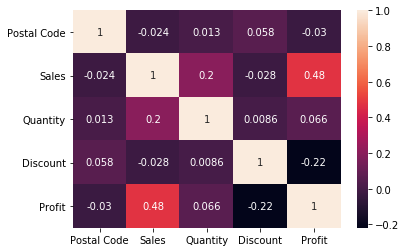

In [18]:
corr = dataset.corr()
sns.heatmap(corr,annot=True)

### Inference
High correlation between sales and profit. 
High negative correlation between discount and profit.
Low correlation between discount and sales.

## Categorizing and Visualizing

Categorizing Sub-Categories to categories and checking number of items

In [19]:
orders_category= dataset.groupby(['Category','Sub-Category'])
orders_category.size()

Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
                 Paper           1370
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
dtype: int64

Categorizing regions and states

In [20]:
orders_region = dataset.groupby(['Region','State'])
orders_region.size()

Region   State               
Central  Illinois                 492
         Indiana                  149
         Iowa                      30
         Kansas                    24
         Michigan                 255
         Minnesota                 89
         Missouri                  66
         Nebraska                  38
         North Dakota               7
         Oklahoma                  66
         South Dakota              12
         Texas                    985
         Wisconsin                110
East     Connecticut               82
         Delaware                  96
         District of Columbia      10
         Maine                      8
         Maryland                 105
         Massachusetts            135
         New Hampshire             27
         New Jersey               130
         New York                1128
         Ohio                     469
         Pennsylvania             587
         Rhode Island              56
         Vermont    

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = dataset['State']
y = dataset['Profit']
plt.rcParams['figure.figsize'] = [200,6]
ax.bar(x,y,width = 0.8)
plt.show()

### Bar Graph for office supplies quantity

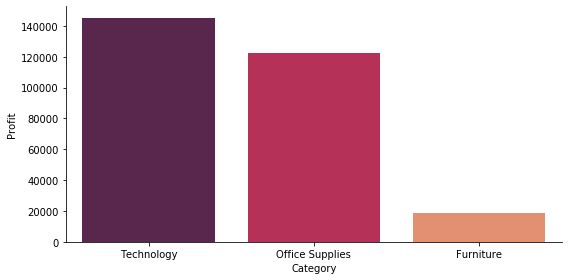

In [68]:
category_profit=dataset.groupby('Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
sns.catplot('Category', 'Profit', data=category_profit, kind='bar', aspect=2, height=4, palette="rocket")

### Visualizing total profit for sub-categories

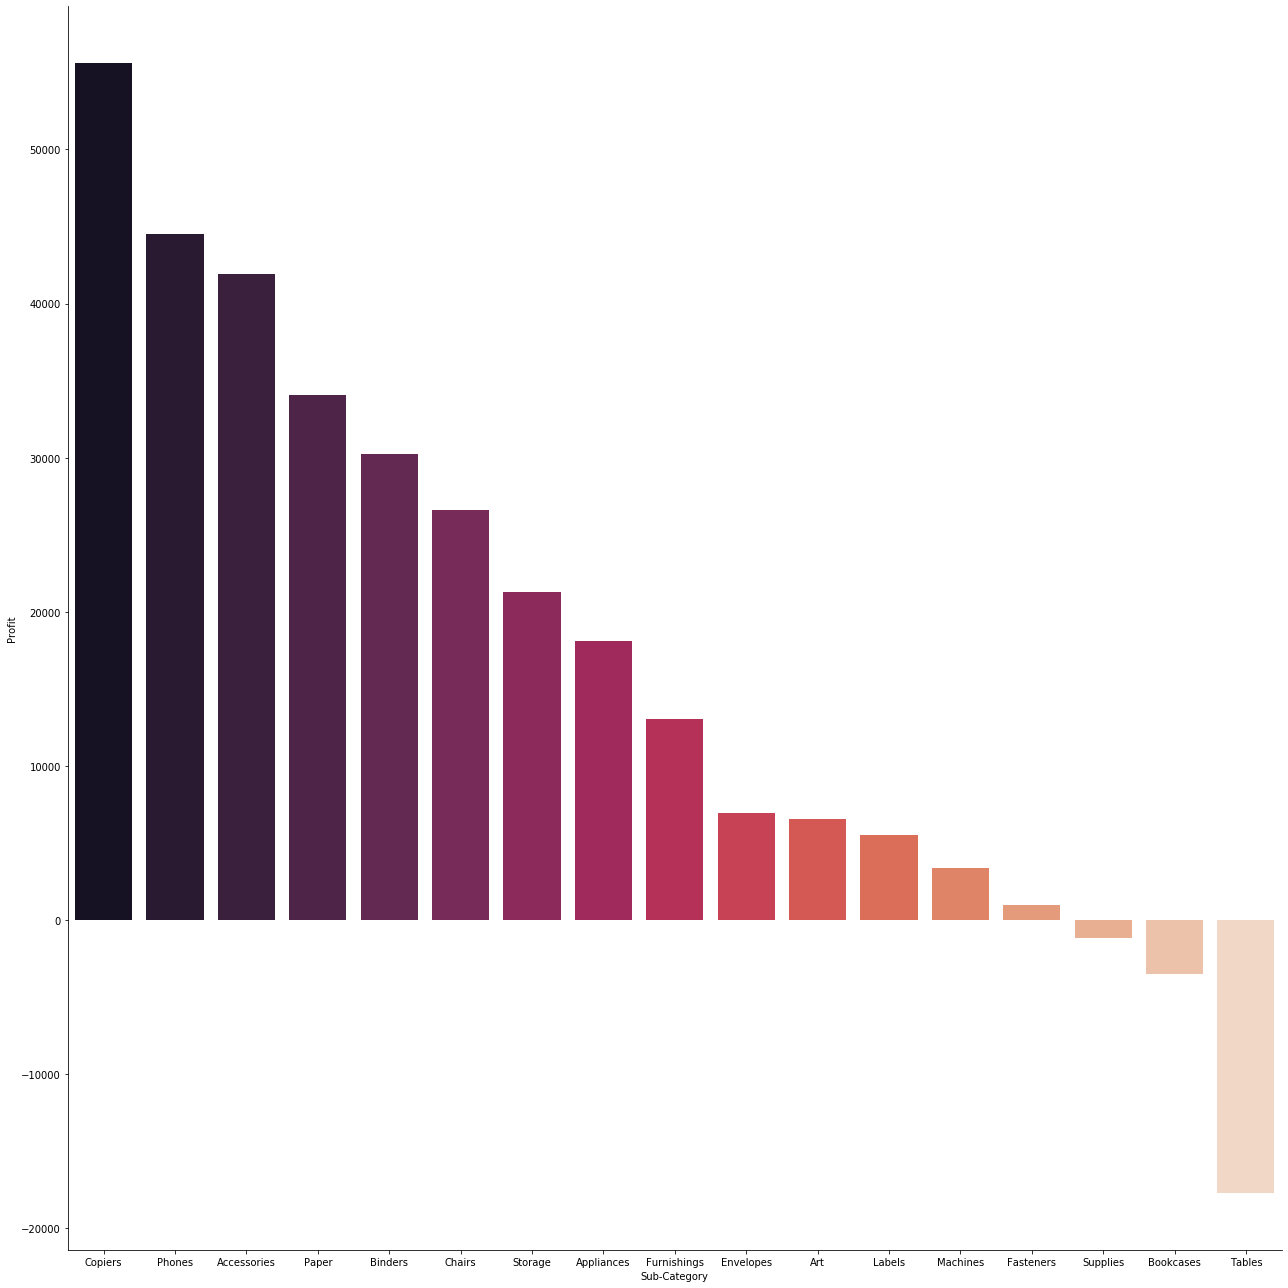

In [69]:
subcategory_profit=dataset.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
sns.catplot('Sub-Category', 'Profit', data=subcategory_profit, kind='bar', aspect=1, height=18, palette="rocket")

### Visualizing state-wise total profit

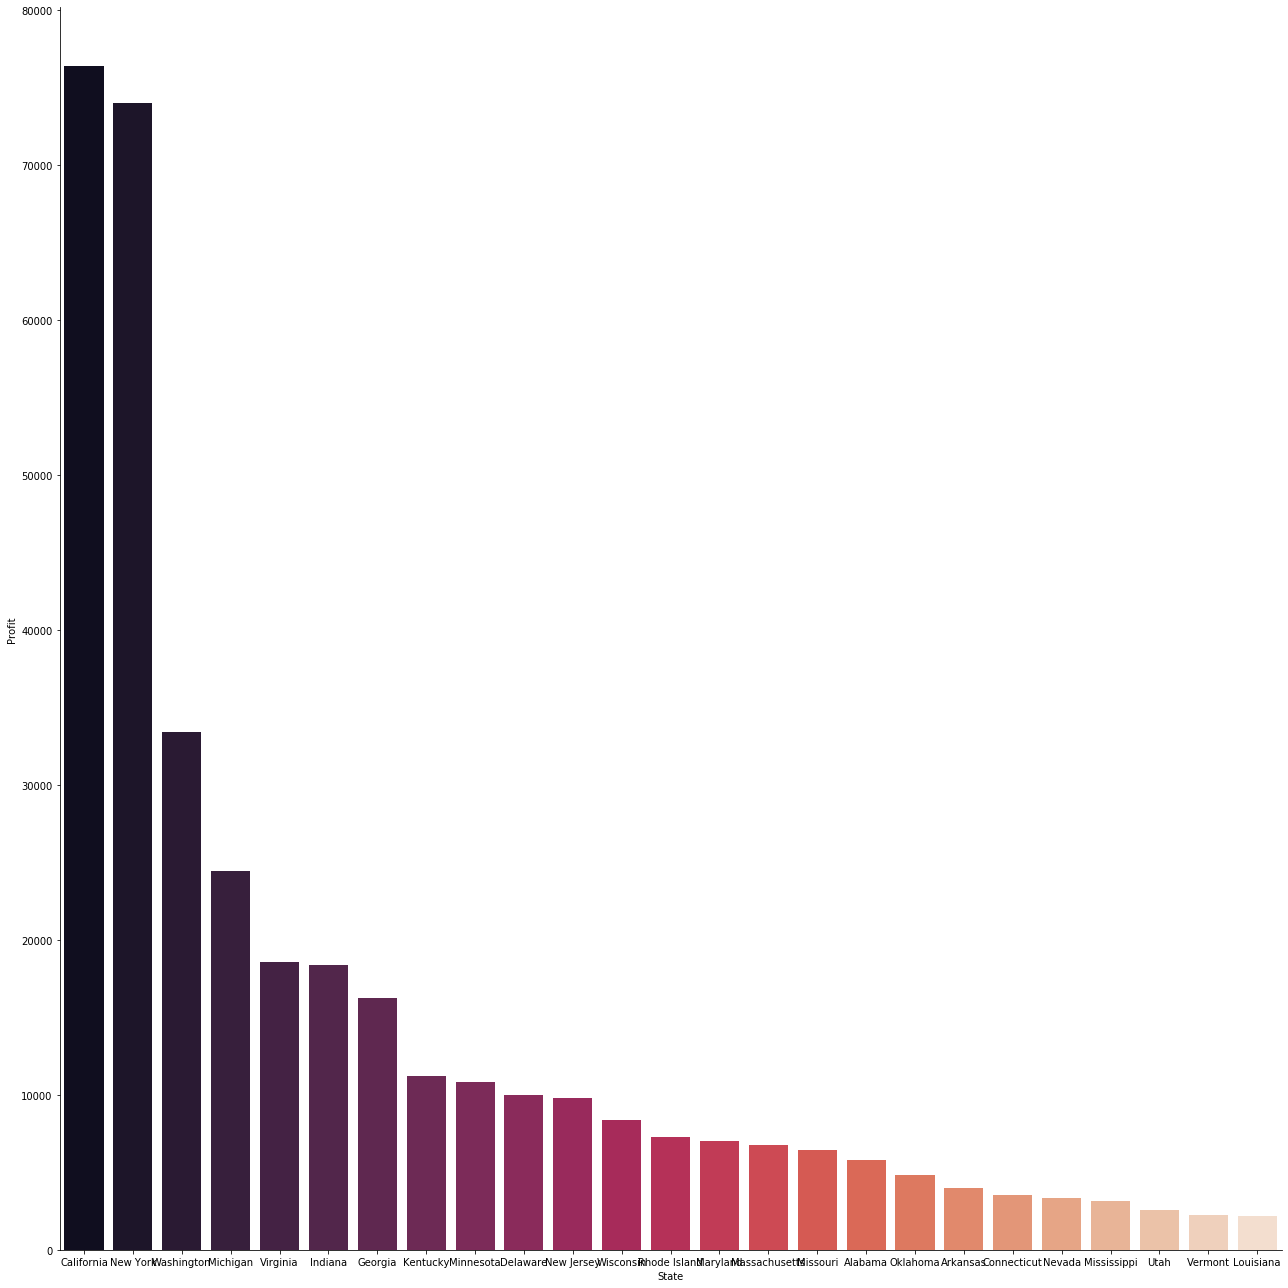

In [76]:
state_profit=dataset.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
top25_state = state_profit.head(25) 
sns.catplot('State', 'Profit', data=top25_state , kind='bar', aspect=1, height=18, palette="rocket")

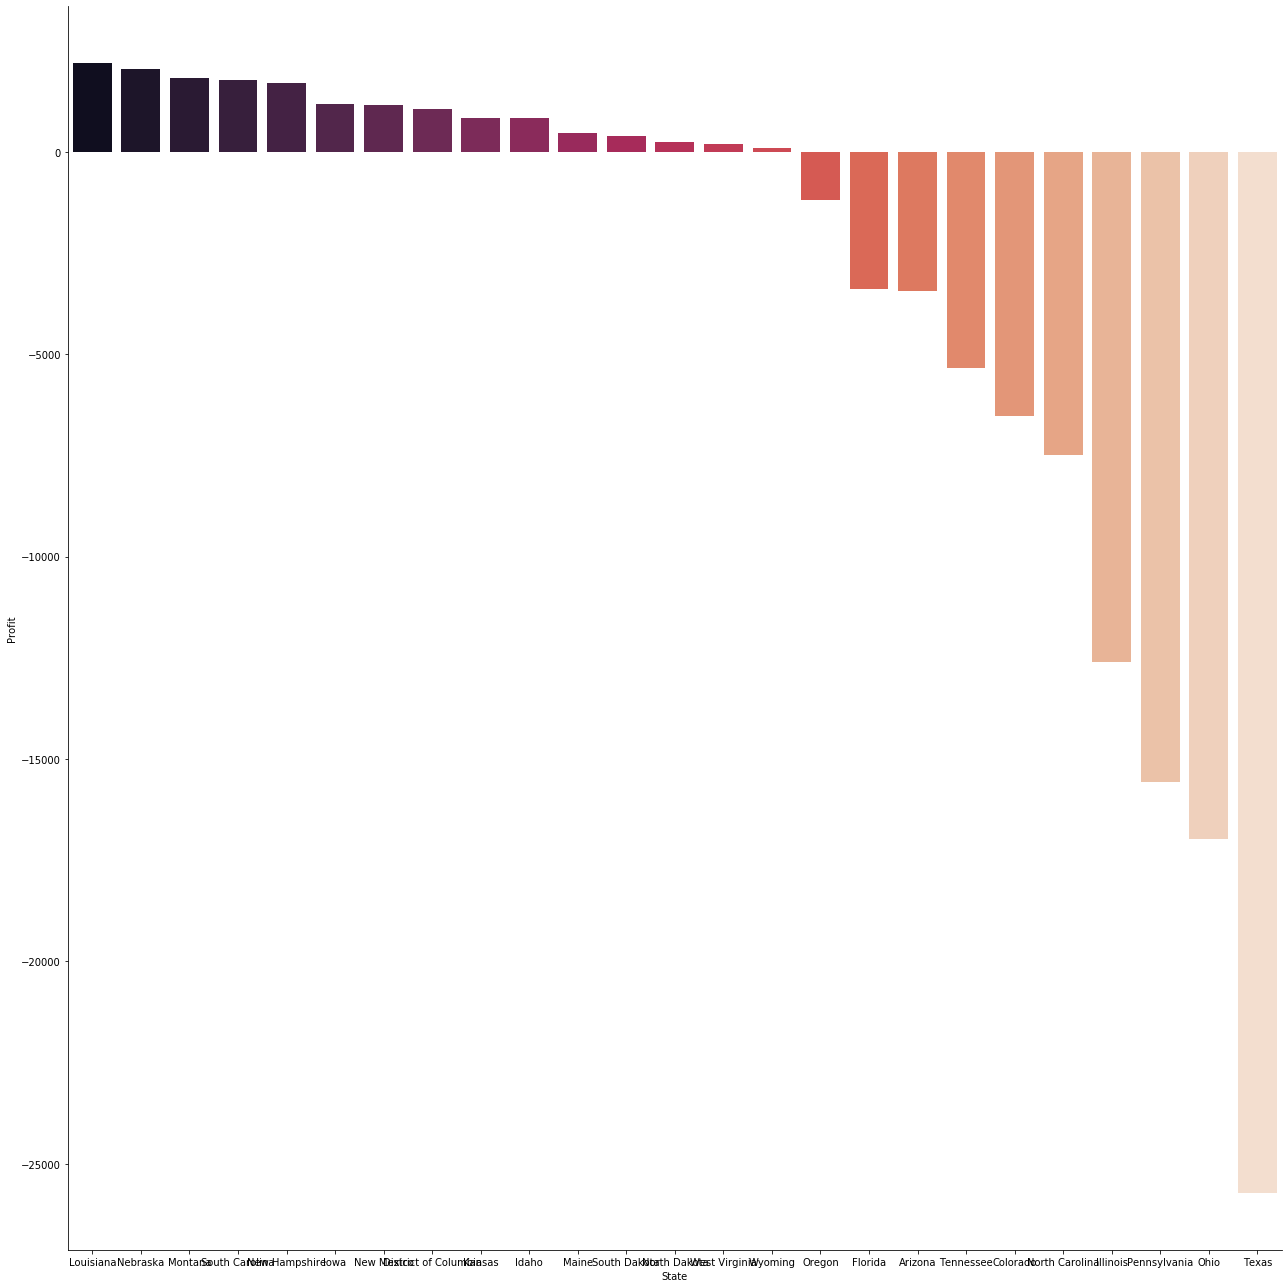

In [77]:
state_profit=dataset.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
bottom25_state = state_profit.tail(25) 
sns.catplot('State', 'Profit', data=bottom25_state , kind='bar', aspect=1, height=18, palette="rocket")

### Visualizing state-wise average profit

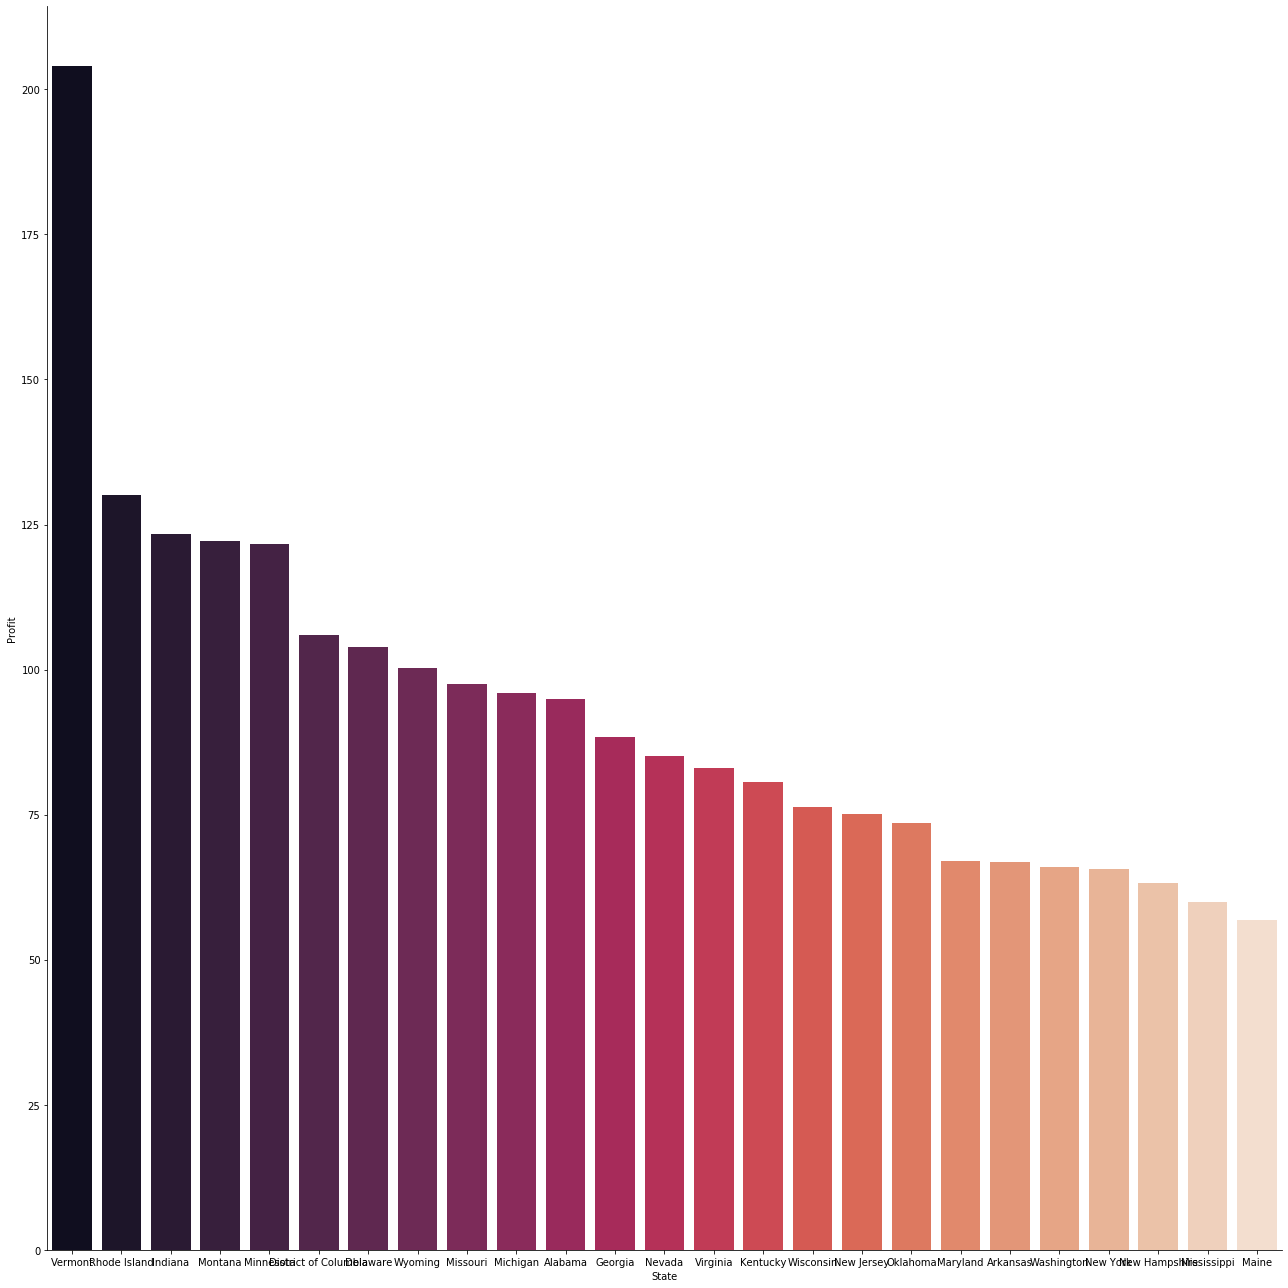

In [78]:
state_profit=dataset.groupby('State')['Profit'].mean().reset_index().sort_values(by='Profit', ascending=False)
top25_state = state_profit.head(25) 
sns.catplot('State', 'Profit', data=top25_state , kind='bar', aspect=1, height=18, palette="rocket")

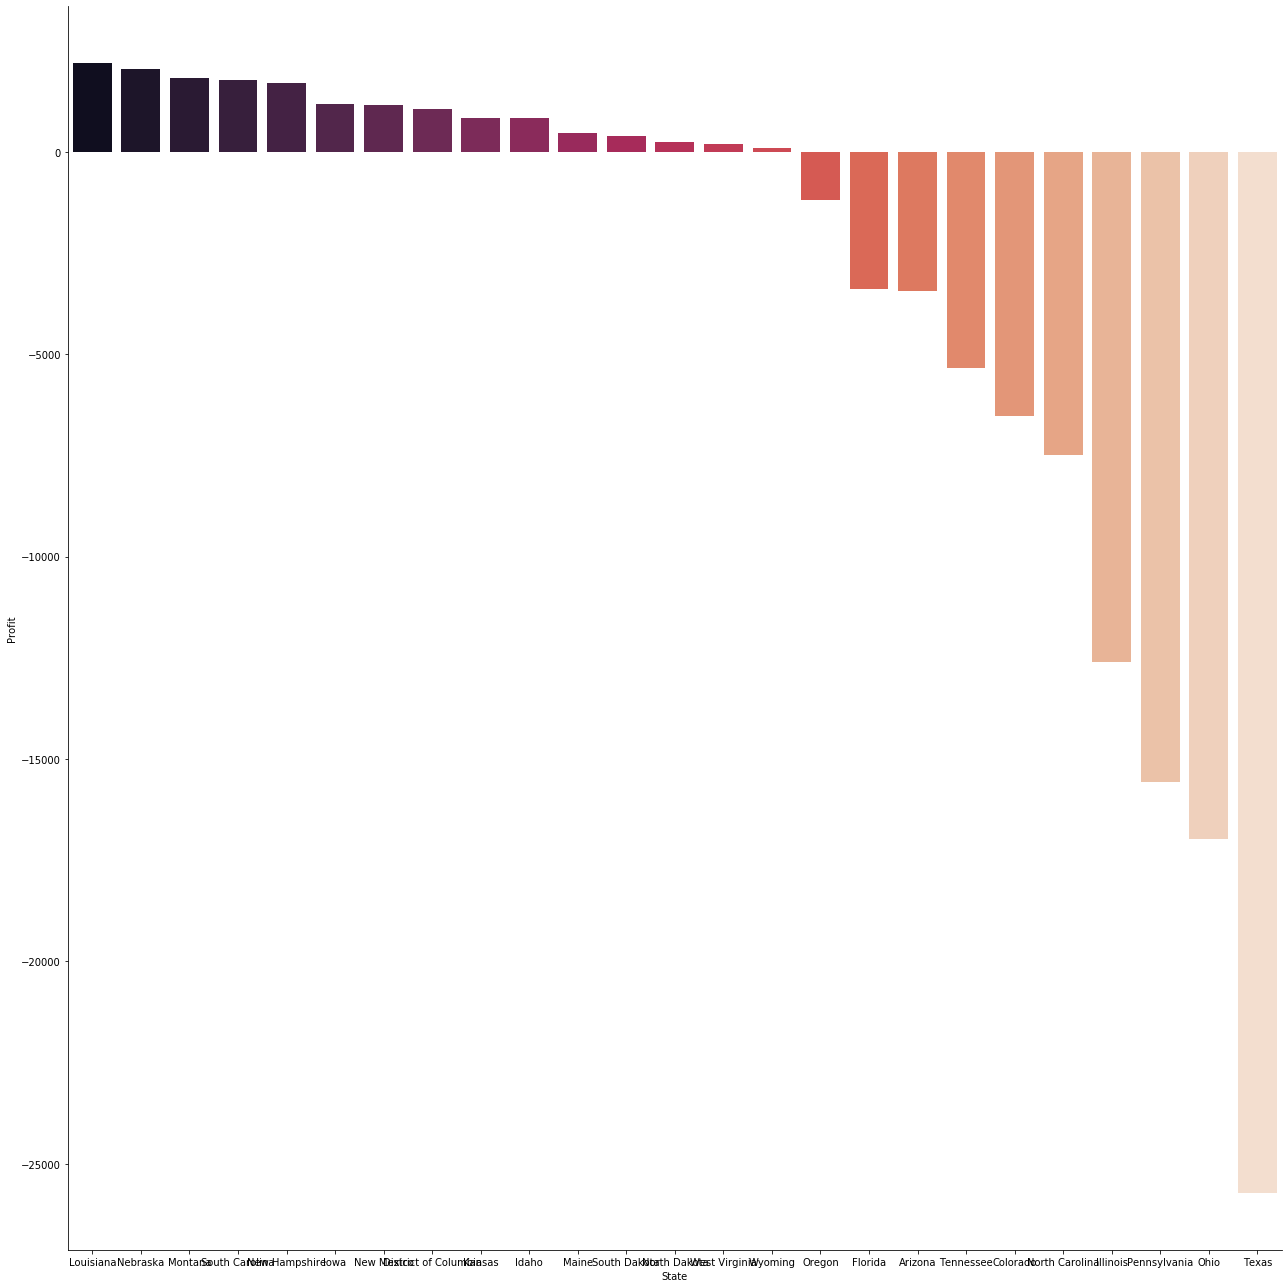

In [79]:
state_profit=dataset.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
bottom25_state = state_profit.tail(25) 
sns.catplot('State', 'Profit', data=bottom25_state , kind='bar', aspect=1, height=18, palette="rocket")

### Checking top 10 and bottom 10 cities in terms of profit

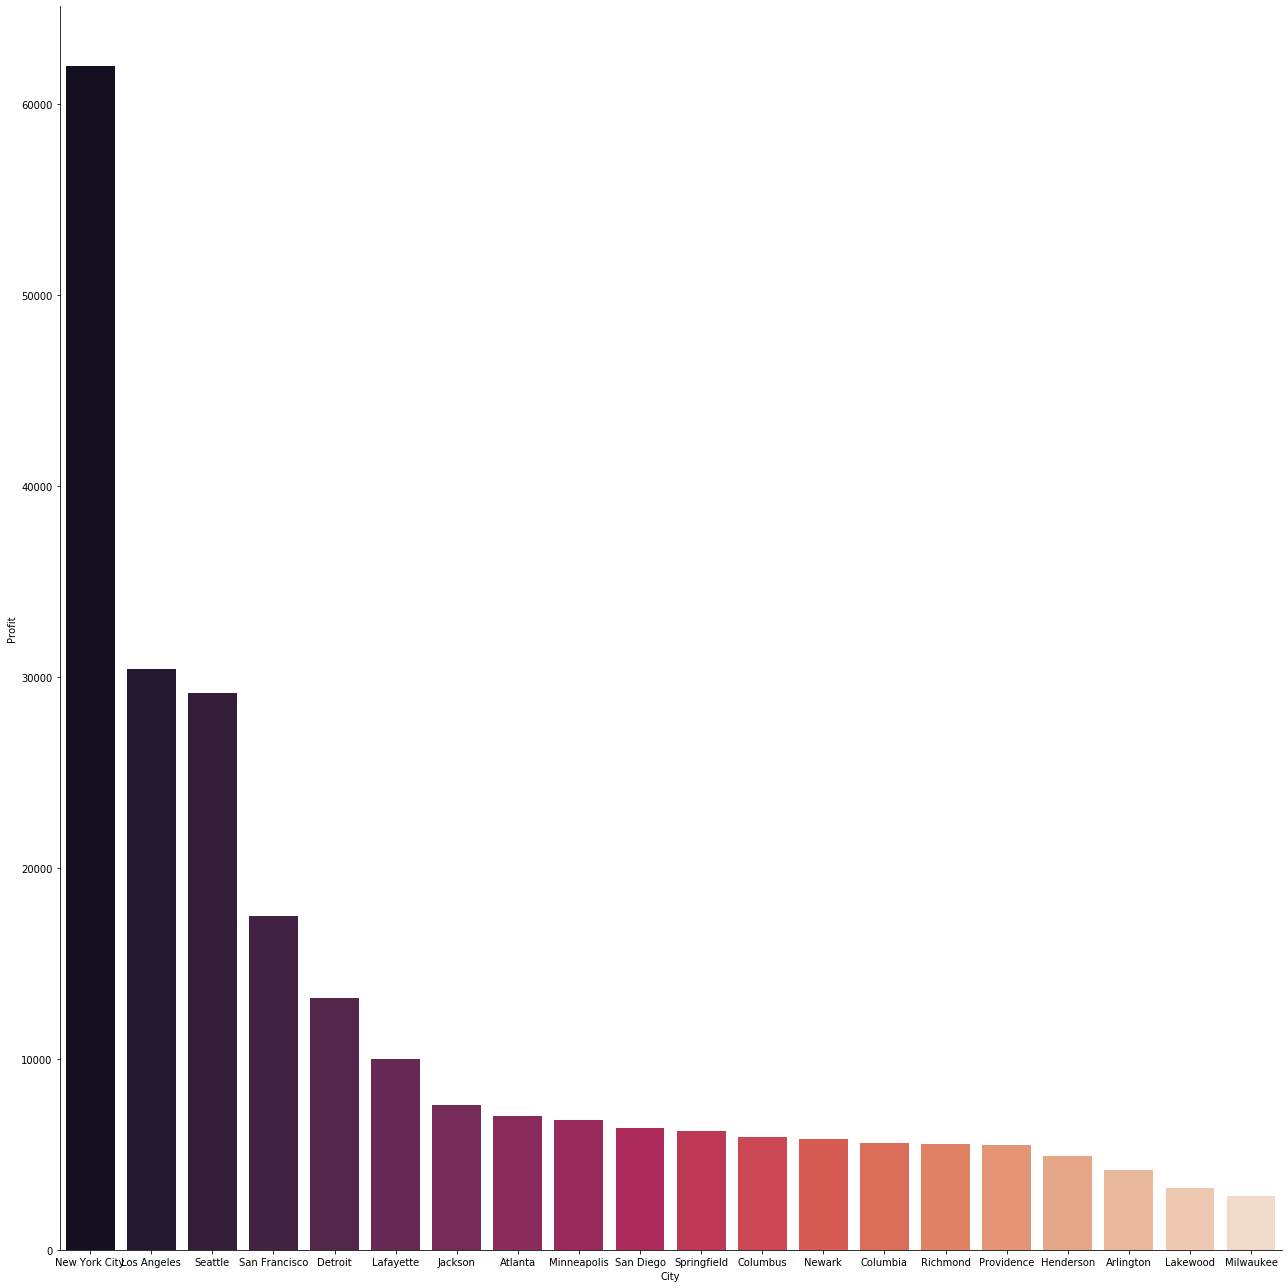

In [80]:
city_profit=dataset.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
top20_city = city_profit.head(20) 
sns.catplot('City', 'Profit', data=top20_city , kind='bar', aspect=1, height=18, palette="rocket")

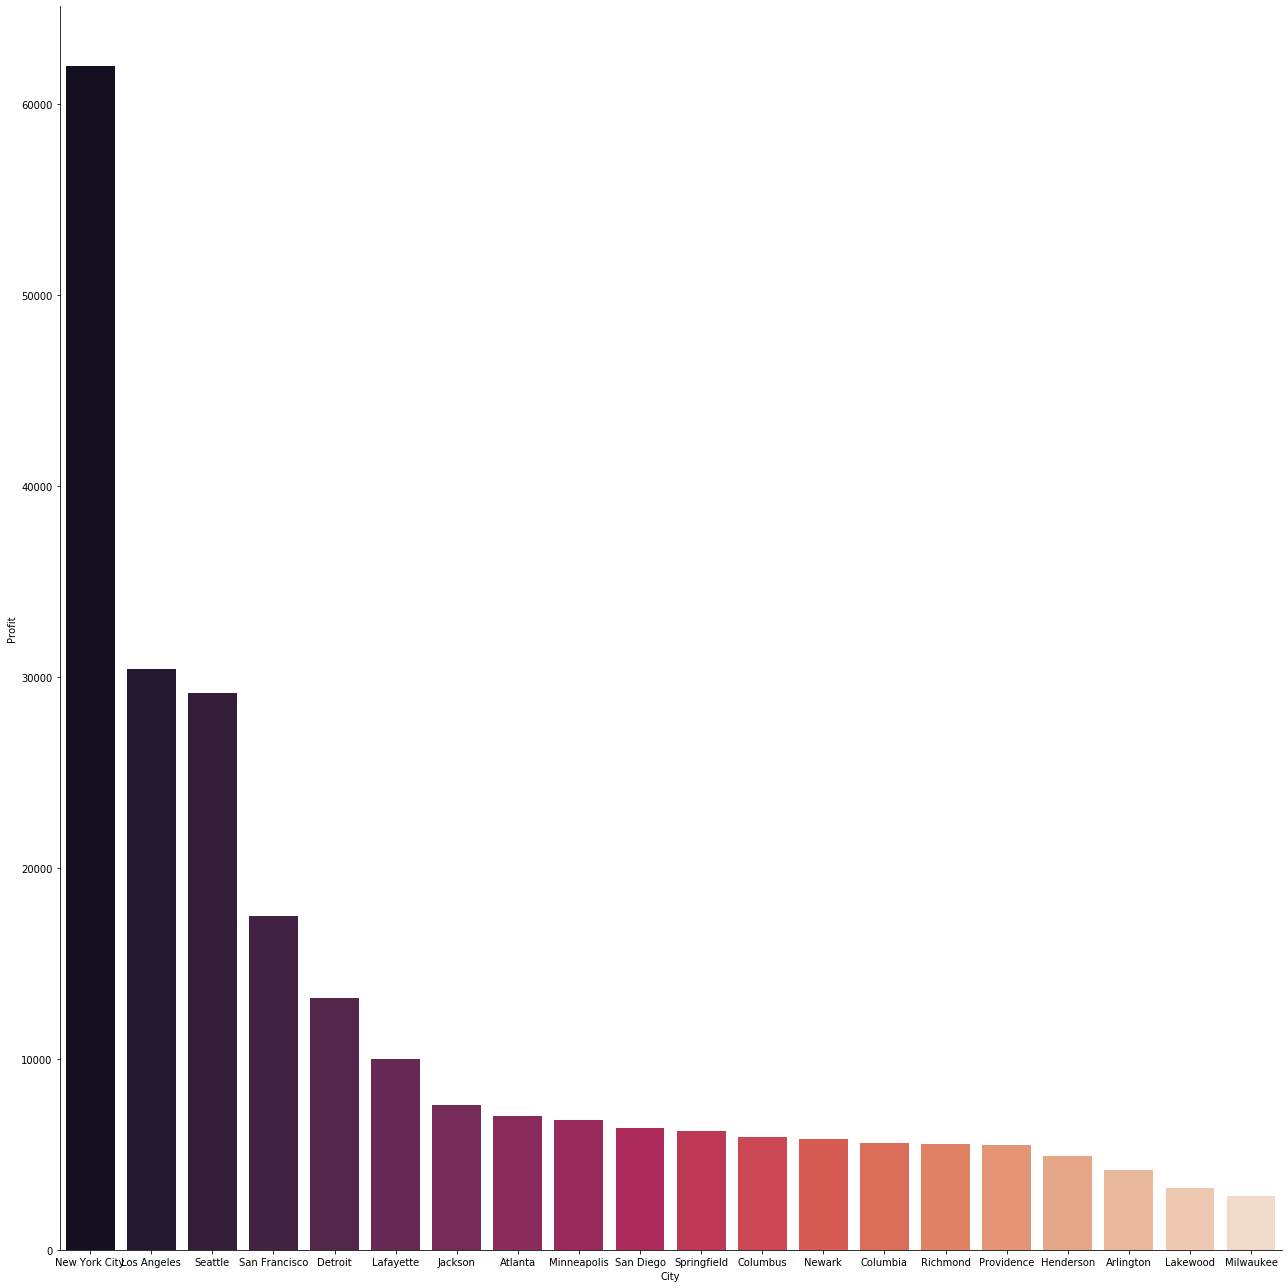

In [81]:
city_profit=dataset.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
bottom20_city = city_profit.tail(20) 
sns.catplot('City', 'Profit', data=top20_city , kind='bar', aspect=1, height=18, palette="rocket")

### Category wise distribution

In [82]:
subcategory_table = pd.crosstab(index=dataset["Category"], 
                          columns=dataset["Sub-Category"])
subcategory_table

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0,0,0,0,228,617,0,0,0,957,0,0,0,0,0,0,319
Office Supplies,0,466,796,1523,0,0,0,254,217,0,364,0,1370,0,846,190,0
Technology,775,0,0,0,0,0,68,0,0,0,0,115,0,889,0,0,0


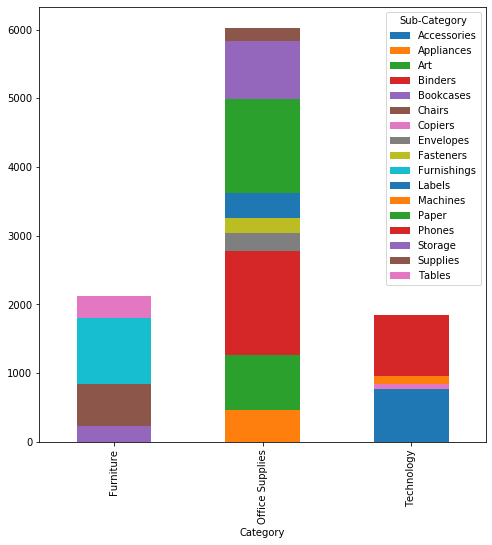

In [95]:
subcategory_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

### Region wise distribution

In [89]:
state_table = pd.crosstab(index=dataset["State"], 
                          columns=dataset["Region"])
state_table

Region,Central,East,South,West
State,,,,
Alabama,0,0,61,0
Arizona,0,0,0,224
Arkansas,0,0,60,0
California,0,0,0,2001
Colorado,0,0,0,182
Connecticut,0,82,0,0
Delaware,0,96,0,0
District of Columbia,0,10,0,0
Florida,0,0,383,0


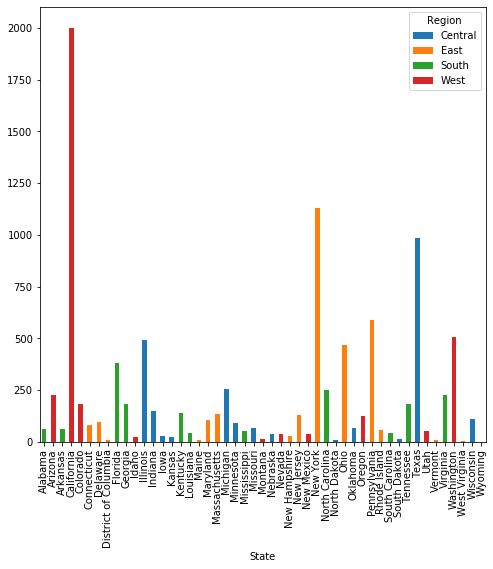

In [90]:
state_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

### Pie Chart for sub-categories occurences

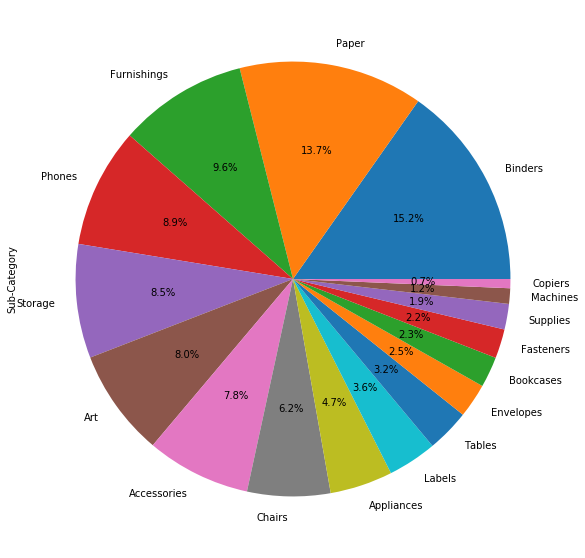

In [96]:
plt.figure(figsize=(15,10))
dataset['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Pie Chart for state occurences

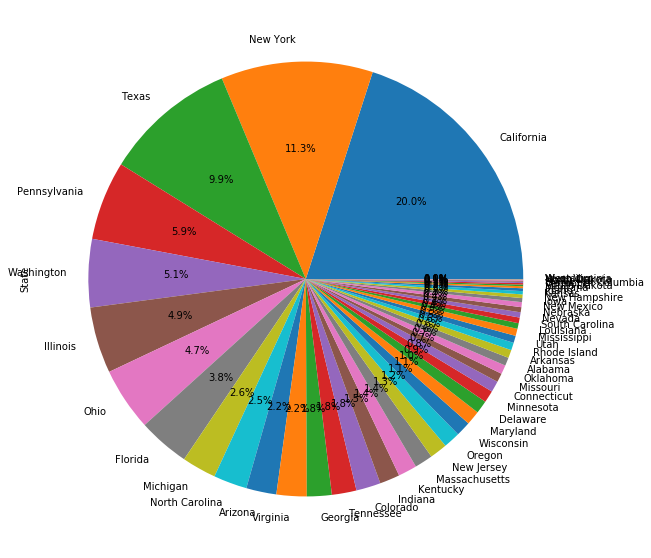

In [28]:
plt.figure(figsize=(15,10))
dataset['State'].value_counts().plot.pie(autopct='%0.1f%%')
plt.show()

# Summary
### 1. Segment: Consumer has the maximum occurences by far and all three have similar profit margins.
### 2. Sales have a high positive correlation with profit of 0.48, so more the sales, more the profit.
### 3. Discount has a significant negative correlation with profit, so more the discount, the lesser the profit.
### 4. Region: Central Region in general has a lower net profit of 17.092709 in contrast to the other 3 regions.
### 5. California has the highest and Texas has the lowest net profit. However, Vermont has the most reliable profit.
### 6. Category : Technology has the highest net profit by far and Furniture has the lowest.
### 7. Sub-Category: Copiers have the highest net profit and Tables result in a loss.